In [382]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import average_precision_score, precision_recall_curve

In [383]:
f1 = pd.read_csv("train_change1.01.csv", skiprows=0)
f2 = pd.read_csv("test_change1.01.csv", skiprows=0)
f1['DEFAULTER'].value_counts()

0    2869
1     707
Name: DEFAULTER, dtype: int64

In [384]:
scl = preprocessing.StandardScaler()
fields = f1.columns.values[:-1]
clean_f1 = pd.DataFrame(scl.fit_transform(f1[fields]), columns=fields)
f1.to_csv('train_change1.01.csv')

In [385]:
f1.corr()

,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
AMOUNT,1.000000,0.216158,0.343881,0.155840,0.096938,0.086427,-0.028885,0.095662,0.075257,0.068881,0.022059,0.004278,0.071263,-0.006072,-0.073777
DUE_MORTGAGE,0.216158,1.000000,0.806782,0.014579,0.308251,-0.059152,-0.001727,0.136292,0.305444,0.139190,-0.015275,-0.025594,0.042158,0.002948,-0.032781
VALUE,0.343881,0.806782,1.000000,0.009480,0.342185,0.041877,-0.001974,0.186059,0.278336,0.112910,-0.008110,-0.030334,0.021486,0.011571,-0.038833
REASON,0.155840,0.014579,0.009480,1.000000,-0.060802,-0.036506,-0.008104,-0.062918,0.121435,0.033590,0.013123,0.007232,0.118994,-0.014266,-0.027423
OCC,0.096938,0.308251,0.342185,-0.060802,1.000000,0.030049,0.040186,0.089771,0.212981,-0.004791,0.011205,-0.009355,-0.020064,0.025504,-0.017894
TJOB,0.086427,-0.059152,0.041877,-0.036506,0.030049,1.000000,0.079525,0.163986,0.067033,-0.022374,-0.008446,-0.047427,-0.023781,-0.025346,-0.040072
DCL,-0.028885,-0.001727,-0.001974,-0.008104,0.040186,0.079525,1.000000,0.022782,0.153513,0.004637,0.021173,0.151714,0.037149,-0.004644,0.311645
CLT,0.095662,0.136292,0.186059,-0.062918,0.089771,0.163986,0.022782,1.000000,0.246345,-0.030369,0.008125,-0.080185,-0.108828,-0.026346,-0.196008
CL_COUNT,0.075257,0.305444,0.278336,0.121435,0.212981,0.067033,0.153513,0.246345,1.000000,0.157337,-0.007738,0.055875,0.086867,-0.021643,-0.023683
RATIO,0.068881,0.139190,0.112910,0.033590,-0.004791,-0.022374,0.004637,-0.030369,0.157337,1.000000,-0.008735,0.029907,0.150397,-0.007268,0.120722


In [386]:
f1.iloc[:,0:-1].values

array([[1.51000e+04, 7.11680e+04, 9.74800e+04, ..., 0.00000e+00,
        1.00000e+00, 2.00950e+00],
       [2.11000e+04, 8.17470e+04, 1.09840e+05, ..., 0.00000e+00,
        1.00000e+00, 1.27240e+00],
       [1.59000e+04, 9.42620e+04, 1.28414e+05, ..., 0.00000e+00,
        2.00000e+00, 1.47250e+00],
       ...,
       [1.49000e+04, 5.04690e+04, 6.94020e+04, ..., 0.00000e+00,
        0.00000e+00, 1.38980e+00],
       [1.11000e+04, 1.16260e+05, 1.43298e+05, ..., 0.00000e+00,
        1.00000e+00, 2.59190e+00],
       [2.36000e+04, 4.48510e+04, 7.01710e+04, ..., 0.00000e+00,
        1.00000e+00, 1.55970e+00]])

In [387]:
f1.values.shape

(3576, 15)

In [388]:
f1

,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
0,15100,71168.000000,97480.0,1,0,9.0,0,119.166667,19.0,33.650308,0,0,1,2.00950,1
1,21100,81747.000000,109840.0,1,0,1.0,0,174.786162,24.0,40.067527,0,0,1,1.27240,0
2,15900,94262.000000,128414.0,1,3,4.0,0,242.736126,42.0,39.231892,1,0,2,1.47250,0
3,12900,110899.000000,124480.0,1,2,7.0,0,204.900000,40.0,33.650308,0,1,2,1.57010,1
4,24600,74028.507532,35523.0,0,0,21.0,0,84.111988,15.0,29.865634,0,0,1,1.50130,0
5,15000,65742.000000,86608.0,0,0,1.0,0,289.581891,20.0,28.285563,0,0,0,1.51770,0
6,22800,75253.000000,106166.0,1,0,1.0,0,176.339376,24.0,38.266594,0,0,1,2.43220,0
7,23200,133766.000000,174085.0,1,3,26.0,3,333.409840,28.0,30.778638,0,0,0,0.82074,0
8,11900,117952.000000,125305.0,1,5,5.0,0,182.172065,18.0,33.210397,0,0,0,2.23040,0
9,13700,55763.000000,87480.0,1,4,9.0,0,194.766667,20.0,33.650308,0,0,0,1.24350,0


In [389]:
from sklearn.utils import shuffle
f1 = shuffle(f1)
f1.values

array([[2.85000e+04, 1.05919e+05, 2.06010e+05, ..., 0.00000e+00,
        2.61640e+00, 0.00000e+00],
       [5.31000e+04, 1.80270e+05, 2.56569e+05, ..., 1.00000e+00,
        2.13510e+00, 0.00000e+00],
       [1.69000e+04, 5.80920e+04, 8.29220e+04, ..., 3.00000e+00,
        3.54980e-01, 0.00000e+00],
       ...,
       [1.91000e+04, 1.65887e+05, 2.16980e+05, ..., 1.00000e+00,
        1.75450e+00, 0.00000e+00],
       [2.50000e+03, 2.78990e+04, 4.07800e+04, ..., 2.00000e+00,
        5.96080e-01, 1.00000e+00],
       [1.91000e+04, 1.71005e+05, 1.99980e+05, ..., 0.00000e+00,
        1.45590e+00, 1.00000e+00]])

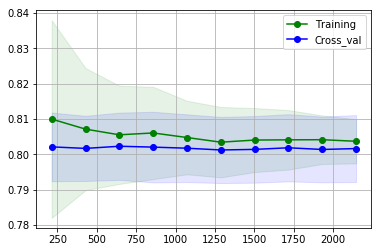

In [390]:
from sklearn.model_selection import learning_curve, ShuffleSplit
X = f1.iloc[:,:-1].values
y = f1.iloc[:,-1].values
cross_val = ShuffleSplit(n_splits=100, test_size=0.4)
distribution = linear_model.LogisticRegression()
train_sizes, train_scores, test_scores = learning_curve(distribution, X, y, cv=cross_val, train_sizes=np.linspace(0.1,1,10))
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color='g', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color='b', alpha=0.1)
plt.plot(train_sizes, train_score_mean, 'o-', color='g', label='Training')
plt.plot(train_sizes, test_score_mean, 'o-', color='b', label='Cross_val')
plt.legend()
plt.show()

LOGISTIC REGRESSION

In [391]:
from sklearn.model_selection import GridSearchCV
log = linear_model.LogisticRegression()
parameter_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
search_grid = GridSearchCV(log, parameter_grid, cv=20, scoring='accuracy')
search_grid.fit(X,y)
mean_scores = [res.mean_validation_score for res in search_grid.grid_scores_]
print(search_grid.best_estimator_)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


/home/vijit/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [392]:
model_logistic = linear_model.LogisticRegression(C=search_grid.best_estimator_.C)
model_logistic.fit(np.array(f1.iloc[:1851,:-1].values), np.array(f1.iloc[:1851,-1].values))
logistic_output_val = model_logistic.predict(np.array(f1.iloc[1851:,:-1].values))
logistic_accuracy = accuracy_score(np.array(f1.iloc[1851:,-1].values), logistic_output_val)
print(logistic_accuracy)

0.7942028985507247


K Nearest Neighbors

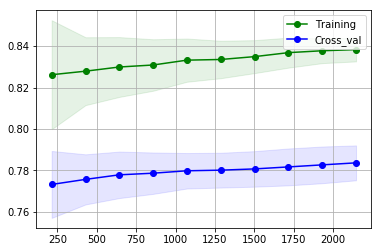

In [393]:
X = f1.iloc[:,1:-1].values
y = f1.iloc[:,-1].values
cross_val = ShuffleSplit(n_splits=100, test_size=0.4)
distribution = KNeighborsClassifier()
train_sizes, train_scores, test_scores = learning_curve(distribution, X, y, cv=cross_val, train_sizes=np.linspace(0.1,1,10))
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color='g', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color='b', alpha=0.1)
plt.plot(train_sizes, train_score_mean, 'o-', color='g', label='Training')
plt.plot(train_sizes, test_score_mean, 'o-', color='b', label='Cross_val')
plt.legend()
plt.show()

In [394]:
knn = KNeighborsClassifier()
parameter_grid = {'n_neighbors':[i for i in range(10, 100)]}
search_grid = GridSearchCV(knn, parameter_grid, cv=20, scoring='accuracy')
search_grid.fit(f1.iloc[:,1:-1].values, f1.iloc[:,-1].values)
search_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

In [395]:
model_knn = KNeighborsClassifier(n_neighbors=search_grid.best_estimator_.n_neighbors)
model_knn.fit(np.array(f1.iloc[:1851,:-1].values), np.array(f1.iloc[:1851,-1].values))
knn_output_val = model_knn.predict(np.array(f1.iloc[1851:,:-1].values))
knn_accuracy = accuracy_score(np.array(f1.iloc[1851:,-1].values), knn_output_val)
print(knn_accuracy)

0.8052173913043478


Multi-Level Perceptron Classification

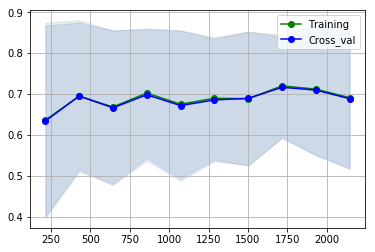

In [396]:
X = f1.iloc[:,1:-1].values
y = f1.iloc[:,-1].values
cross_val = ShuffleSplit(n_splits=100, test_size=0.4)
distribution = MLPClassifier()
train_sizes, train_scores, test_scores = learning_curve(distribution, X, y, cv=cross_val, train_sizes=np.linspace(0.1,1,10))
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color='g', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color='b', alpha=0.1)
plt.plot(train_sizes, train_score_mean, 'o-', color='g', label='Training')
plt.plot(train_sizes, test_score_mean, 'o-', color='b', label='Cross_val')
plt.legend()
plt.show()

In [397]:
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier(solver='lbfgs', alpha=0.00001, hidden_layer_sizes=(5, 2))
model_nn.fit(np.array(f1.iloc[:1851,:-1].values), np.array(f1.iloc[:1851,-1].values))
nn_output_val = model_nn.predict(np.array(f1.iloc[1851:,:-1].values))
nn_accuracy = accuracy_score(np.array(f1.iloc[1851:,-1].values), nn_output_val)
print(nn_output_val, nn_accuracy)

[0 0 0 ... 0 0 0] 0.7947826086956522


Decision Tree Classification

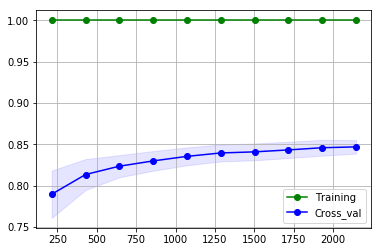

In [398]:
X = f1.iloc[:,1:-1].values
y = f1.iloc[:,-1].values
cross_val = ShuffleSplit(n_splits=100, test_size=0.4)
distribution = tree.DecisionTreeClassifier()
train_sizes, train_scores, test_scores = learning_curve(distribution, X, y, cv=cross_val, train_sizes=np.linspace(0.1,1,10))
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color='g', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color='b', alpha=0.1)
plt.plot(train_sizes, train_score_mean, 'o-', color='g', label='Training')
plt.plot(train_sizes, test_score_mean, 'o-', color='b', label='Cross_val')
plt.legend()
plt.show()

In [399]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
parameter_grid = {'max_depth':[i for i in range(1,15)]}
search_grid = GridSearchCV(dt, parameter_grid, cv=20, scoring='accuracy')
search_grid.fit(f1.iloc[:,1:-1].values, f1.iloc[:,-1].values)
mean_scores = [res.mean_validation_score for res in search_grid.grid_scores_]
print(search_grid.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


/home/vijit/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [400]:
model_dtree = tree.DecisionTreeClassifier(max_depth=search_grid.best_estimator_.max_depth)
model_dtree.fit(f1.iloc[:1851,:-1].values, f1.iloc[:1851,-1].values)
dtree_output_val = model_dtree.predict(np.array(f1.iloc[1851:,:-1].values))
dtree_accuracy = accuracy_score(np.array(f1.iloc[1851:,-1].values), dtree_output_val)
print(dtree_accuracy)

0.8620289855072464


K-Means Clustering

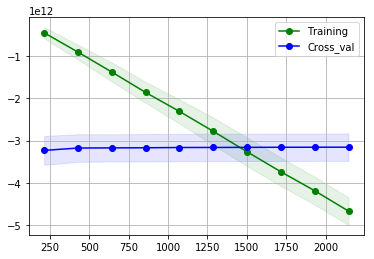

In [401]:
X = f1.iloc[:,1:-1].values
y = f1.iloc[:,-1].values
cross_val = ShuffleSplit(n_splits=100, test_size=0.4)
distribution =  KMeans(n_clusters=2)
train_sizes, train_scores, test_scores = learning_curve(distribution, X, y, cv=cross_val, train_sizes=np.linspace(0.1,1,10))
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color='g', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color='b', alpha=0.1)
plt.plot(train_sizes, train_score_mean, 'o-', color='g', label='Training')
plt.plot(train_sizes, test_score_mean, 'o-', color='b', label='Cross_val')
plt.legend()
plt.show()

In [402]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(f1.iloc[:1851,:-1].values, f1.iloc[:1851,-1].values)
kmeans_output_val = model_kmeans.predict(np.array(f1.iloc[1851:,:-1].values))
kmeans_accuracy = accuracy_score(np.array(f1.iloc[1851:,-1].values), dtree_output_val)
print(kmeans_accuracy)

0.8620289855072464


Now we make predictions over test where we dont have acutal labels
and we compare our results amoungst all predictions

In [403]:
f2 = pd.read_csv("test_change1.01.csv")
f2 = shuffle(f2)
f2

,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3
2064,25500,62805.000000,96307.000000,1,0,17.0,0,111.620127,16.000000,33.770748,0,0,1,1.77060
1523,89300,53944.000000,92904.000000,1,0,15.0,0,213.279697,15.000000,35.566590,0,0,0,1.78800
1662,23900,101435.000000,147581.000000,0,4,10.0,0,162.255742,23.000000,32.729421,0,0,1,2.25430
1324,17900,13559.000000,173340.000000,0,3,23.0,0,79.838899,21.000000,30.072792,0,0,2,1.79850
2080,8400,67614.000000,86925.000000,1,4,14.0,0,222.474925,17.000000,25.204297,0,0,0,2.13140
1363,12700,32641.000000,41279.000000,1,0,10.0,1,171.407106,29.000000,37.812670,0,0,7,2.05560
855,8100,47053.000000,65438.000000,1,1,2.0,0,100.993790,12.000000,38.883711,0,0,3,1.99050
1493,12700,84832.000000,110233.000000,1,4,8.0,0,193.422606,37.000000,40.855078,0,0,1,1.01830
1815,9500,53143.000000,62225.000000,1,0,23.0,0,277.787744,28.000000,37.831852,1,0,3,1.81610
965,8800,68085.000000,82498.000000,0,0,1.0,0,106.102255,7.000000,36.458939,0,0,0,2.37790


for Logistic Regresssion

In [404]:
logistic_output_test = model_logistic.predict(np.array(f2.iloc[:,:].values))

K-Means Clustering

In [405]:
kmeans_output_test = model_kmeans.predict(np.array(f2.iloc[:,:].values))

Decision Tree Classification

In [406]:
dtree_output_test = model_dtree.predict(np.array(f2.iloc[:,:].values))

K-Nearest Neigbhors Classification

In [407]:
knn_output_test = model_knn.predict(np.array(f2.iloc[:,:].values))

Multi-level Perceptron Classification 

In [408]:
nn_output_test = model_nn.predict(np.array(f2.iloc[:,:].values))